In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install roboflow

from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 143.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [4]:
!pip install "lightly-train[ultralytics]" "supervision==0.25.1"

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/5

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dMnFCoF0JyMtpeDmBVam")
project = rf.workspace("sunflower-detection").project("final-1yr0d")
version = project.version(1)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-1 in yolov12:: 100%|██████████| 3310/3310 [00:02<00:00, 1139.88it/s]


In [6]:
import os

dataset_path = "/content/Final-1"
splits = ["train", "valid", "test"]

for split in splits:
    images_path = os.path.join(dataset_path, split, "images")
    num_images = len([f for f in os.listdir(images_path) if f.endswith(('.jpg','.png','.jpeg'))])
    print(f"{split.capitalize()} images: {num_images}")

total = sum(len([f for f in os.listdir(os.path.join(dataset_path, s, "images")) if f.endswith(('.jpg','.png','.jpeg'))]) for s in splits)
print(f"Total images: {total}")


Train images: 1319
Valid images: 165
Test images: 165
Total images: 1649


In [7]:
from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("/content/Final-1/data.yaml")
print(dataset)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
{'train': '/content/Final-1/train/images', 'val': '/content/Final-1/valid/images', 'test': '/content/Final-1/test/images', 'nc': 2, 'names': {0: 'Backside-Sunflower', 1: 'Sunflower'}, 'roboflow': {'workspace': 'sunflower-detection', 'project': 'final-1yr0d', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/sunflower-detection/final-1yr0d/dataset/1'}, 'yaml_file': '/content/Final-1/data.yaml', 'channels': 3, 'path': PosixPath('/content/Final-1')}


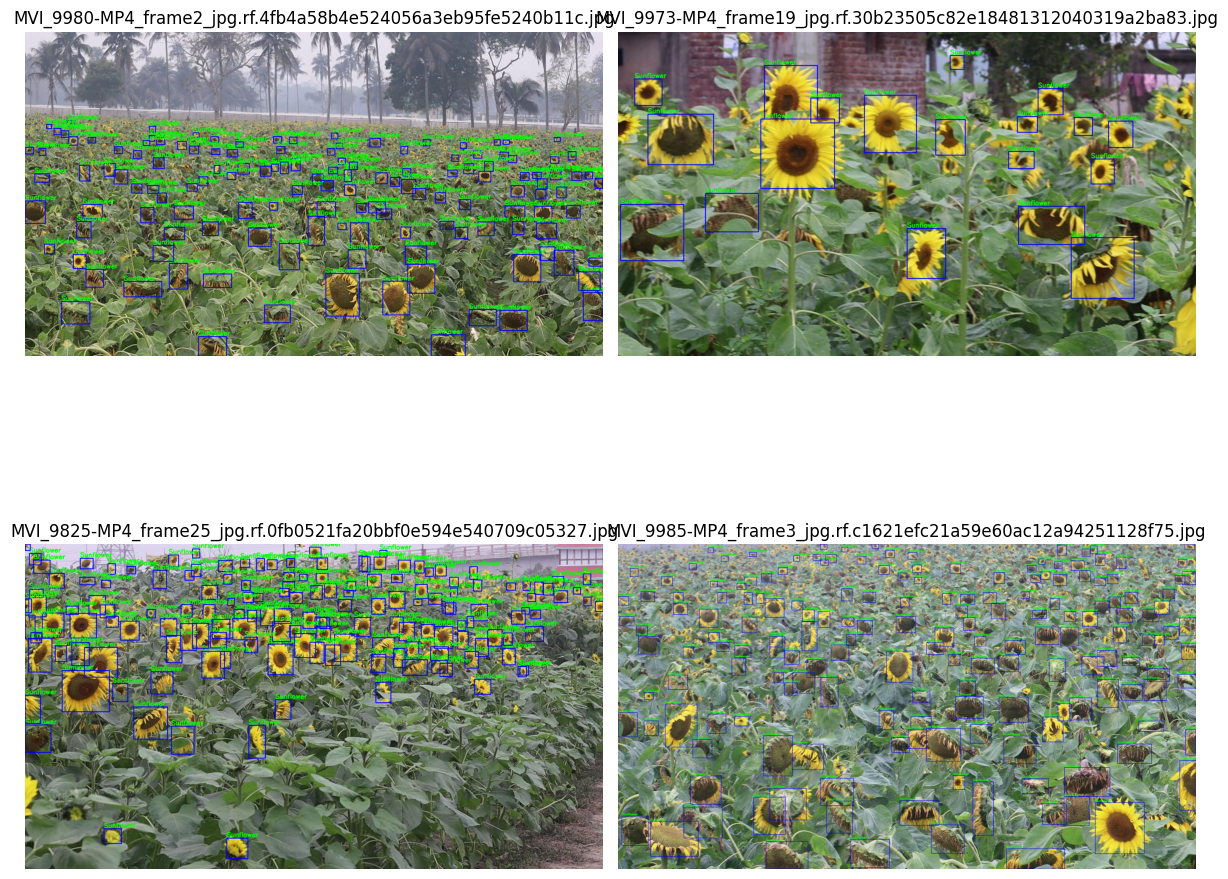

In [8]:
import os
import random
import yaml
import cv2
import matplotlib.pyplot as plt

# Paths
dataset_path = "/content/Final-1"
train_img_path = os.path.join(dataset_path, "train/images")
train_label_path = os.path.join(dataset_path, "train/labels")
yaml_file = os.path.join(dataset_path, "data.yaml")

# Load class names from YAML
with open(yaml_file, "r") as f:
    data = yaml.safe_load(f)
names = data["names"]

# Pick random images
image_files = os.listdir(train_img_path)
random_imgs = random.sample(image_files, 4)

# Plotting setup
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

for i, img_name in enumerate(random_imgs):
    img_path = os.path.join(train_img_path, img_name)
    label_path = os.path.join(train_label_path, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

    # Load image
    img = cv2.imread(img_path)
    h, w, _ = img.shape

    # Load labels if exists
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            labels = [line.strip().split() for line in f.readlines()]

        for label in labels:
            cls, x, y, bw, bh = map(float, label[:5])
            cls = int(cls)
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, names[cls], (x1, y1 - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title(img_name)
    ax[i].axis("off")

plt.tight_layout()
plt.show()


In [9]:
import lightly_train

if __name__ == "__main__":
    lightly_train.train(
        out="output/my_experiment",
        data="/content/Final-1",
        model="ultralytics/yolo12s.yaml",
        method="distillationv1",
        method_args={
            "teacher": "dinov3/vits16",

            "teacher_url": "/content/drive/MyDrive/dinov3_vits16_pretrain_lvd1689m-08c60483.pth",
        },
        overwrite=True
    )


DEBUG:lightly_train._commands.common_helpers:Checking if output directory '/content/output/my_experiment' exists.
Args: {
    "accelerator": "auto",
    "batch_size": 128,
    "callbacks": null,
    "checkpoint": null,
    "data": "/content/Final-1",
    "devices": "auto",
    "embed_dim": null,
    "epochs": "auto",
    "float32_matmul_precision": "auto",
    "loader_args": null,
    "loggers": null,
    "method": "distillationv1",
    "method_args": {
        "teacher": "dinov3/vits16",
        "teacher_url": "/content/drive/MyDrive/dinov3_vits16_pretrain_lvd1689m-08c60483.pth"
    },
    "model": "ultralytics/yolo12s.yaml",
    "model_args": null,
    "num_nodes": 1,
    "num_workers": "auto",
    "optim": "auto",
    "optim_args": null,
    "out": "output/my_experiment",
    "overwrite": true,
    "precision": "auto",
    "resume": null,
    "resume_interrupted": false,
    "seed": 0,
    "strategy": "auto",
    "trainer_args": null,
    "transform_args": null
}
INFO:lightly_train.

Training: |          | 0/? [00:00<?, ?it/s]

DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/output/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/output/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/output/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/output/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/output/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/output/my_experiment/exported_models/exported_last.pt' in format 'ModelForma

In [10]:
from ultralytics import YOLO

if __name__ == "__main__":
    # Load the exported model.
    model = YOLO("/content/output/my_experiment/exported_models/exported_last.pt")

    # Fine-tune with ultralytics.
    model.train(data='/content/Final-1/data.yaml', epochs=150)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Final-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/output/my_experiment/exported_models/exported_last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True